# Příklad o Pizze
* témata: kvadratická rovnice, definice funkce v pythonu, fsolve()

## Zadání
* Chceš jít s kamarádem na Pizzu.
* Nabídka je jasná, menší pizza stojí 100; větší, která má o 10cm větší průměr, stojí ale 200

## Otázky
* Při jakém průměru se vyplatí koupit 2 menší, a kdy 1 větší?
* Jak se řešení změní pokud vás nezajímá 1 cm suchého okraje pizzy?

---
---
# Pokud je toto tvůj první Jupyter Notebook:
* Buňka (cell) se provede kombinací Shift-Enter, musíš v ní mít ale kurzor.
* Po úspěšném proběhnutí buňky se objeví nalevo od ní "pořadové" číslo průběhu.
* Provedení buňky a vytvoření nové prázdné pod ní, použij Alt-Enter.
* Jakýkoli text za znakem # je komentář a Python ho ignoruje až do konce řádku.
* Pozor: Pokud proběhneš prázdnou buňku, která má pod sebou výstup jako nápovědu, nápověda ti zmizí, proto Alt-Enter.
---
---

In [1]:
# importuj klasické moduly jako ve výkladu
import numpy as np
import matplotlib.pyplot as plt

# pokročilý trik, který umožňuje měnit parametry vašich grafů pro celý sešit
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,6] # velikost grafu
mpl.rcParams['lines.linewidth'] = 3  # tloušťka čáry
mpl.rcParams['lines.markersize'] = 10  # velikost bodů v grafu
mpl.rcParams['xtick.labelsize'] = 12  # velikost fontu popisků osových bodů x
mpl.rcParams['ytick.labelsize'] = 12 # velikost fontu popisků osových bodů y
mpl.rcParams['axes.labelsize'] = 'larger'  # velikost fontu názvu os

# odkomentováním příkazu vypíšete všechny nastavitelné vlastnosti
# svobodě Python meze rozhodně neklade:)
# mpl.rcParams.keys()

In [2]:
# neznámá je pro nás průměr pizzy (d)
# vytvoř pole rozumných hodnot d
d = np.linspace(0, 50, 101)
print(d)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50. ]


## Podmínka kterou řešíme je, kdy dvě plochy menší pizzy jsou víc než plocha 1 větší

$2S_{mensi}{\gt}S_{vetsi}$

* Doufejme, že je pizza kruhová

$ 2{\cdot}\pi\left(\dfrac{d}{2}\right)^2 \gt \pi\left(\dfrac{d+10}{2}\right)^2$

Po převedení na jednu stranu řešíme, kdy má výsledná funkce hodnoty > 0
* POZN. $\pi$ se v pythonu zapisuje jako np.pi

In [3]:
# spočti hodnoty funkce pro d, která sis vybrala
f1 = 2*np.pi*(d/2)**2 - np.pi*((d+10)/2)**2

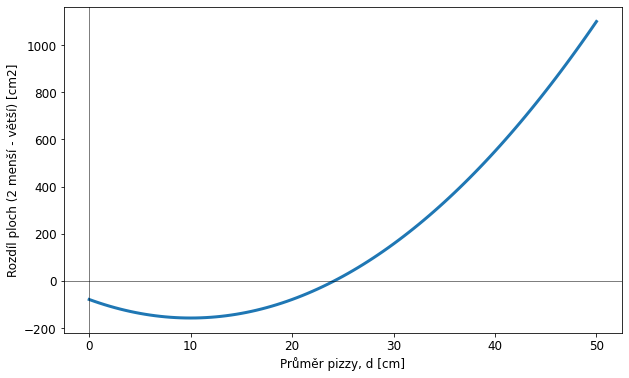

In [4]:
# A teď vykresli naši funkci, spolu s osou x, jako je níže
plt.plot(d, f1)
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Průměr pizzy, d [cm]')
plt.ylabel('Rozdíl ploch (2 menší - větší) [cm2]')
plt.show()

### Od nějakých 23cm průměru se vždy vyplatí koupit 2 menší pizzy
---

## Spočtěme průsečík přesně. Máme dvě možnosti:
1. V sešitu intro jsme jsme hledali průsečíky kv. funkce s osou x, v případě že známe a,b,c.
2. Při řešení složitých výrazů to neni moc výhodné pokaždé upravovat rovnici na její obecný tvar s parametry a,b,c.
* V Pythonu máme funkci FSOLVE, která řeší rovnice numericky.

In [5]:
# musíme si ji však importovat, abychom ji mohli použít
from scipy.optimize import fsolve

In [6]:
## Do fsolve musíme vložit funkci proměné/proměných
## To můžeme udělat například následovně:
# definuji (def) funkci jménem rozdil_ploch (to co vykreslujeme na ose y)
def rozdil_ploch(d):  # rozdil_ploch je závislý jen na d
    rozdil = 2*np.pi*(d/2)**2 - np.pi*((d+10)/2)**2  # stejný výraz jako výše
    return rozdil  # 'návrat', tzn. funkce vrací proměnou, což je rozdil.

In [7]:
# funcki si otestujeme pro d=10
rozdil_ploch(10)

-157.07963267948966

To znamená, že pro průměr 10cm, 2 pizzy jsou menší o $157\,cm^2$.

---

## Můžete sami vyzkoušet vkládat různé hodnoty d
 * Zkusmo tak zjistíte, kdy se rozdíl ploch stane kladným.
 * A to je moment, kdy chcete koupit 2menší pizzy místo 1 větší.

In [8]:
# Teď vložíme tento výraz do fsolve, abychom to měli doufejme přesnější
fsolve(rozdil_ploch)

TypeError: fsolve() missing 1 required positional argument: 'x0'

In [9]:
## Co znamená tato chyba?
# FSOLVE po nás potřebuje nutný vstup x0: což je v podstatě odhad (nástřel) řešení.
# pokud napíšete fsolve a poté Shift-Tab, měla by se vám objevit nápověda se všemi vstupními parametry pro fsolve
fsolve(rozdil_ploch, 11)

array([24.14213562])

# FSOLVE je mocný nástroj
* Funguje na jakýkoli typ rovnice, nejen na kvadratickou.
* Můžeme s ním řešit dokonce i soustavy rovnic.

## Bohužel nemůžeme být příliš důvěřiví (Vyzkoušejte sami):
* Pokud budete s x0 blízko prvního průsečíku, vrátí se vám kořen kv. rovnice, který je nelogický (negativní pizza).
* Pokud budete blízko Vrcholu (x0=10), tj. minima kv. funkce, FSOLVE bude zmatená, kterým směrem se z minima paraboly vydat.
* Pokud budete rozumně blízko s x0, máte vyhráno.

---

## Jestli už vám vyhládlo, dobrá práce a dobrou chuť. Pokud ne, zkuste rozšířit řešení o problém se suchým okrajem...

* Co když nemáte rádi ten proklatý suchý okraj pizzy, a měl tedy být vyloučen z našich úvah?
* Jak to ovlivní vaše rozhodnutí se 2 pizzami?

In [10]:
# Nejjednodušší je upravit naši funkci pro výpočet rozdílu ploch 
# přidáním volného parametru okraj, který má význam tloušťky okraje v cm.
def rozdil_ploch(d, okraj=0): # okraj=0, pokud neuvedeme parametr okraj, python použije hodnotu předdefinovanou autorem
    rozdil = 2*np.pi*((d-2*okraj)/2)**2 - np.pi*((d+10-2*okraj)/2)**2
    return rozdil

In [15]:
# Zopakujte FSOLVE, hodnotu tloušťky okraje vložíte jako args=1
fsolve(rozdil_ploch, 15, args=1)

array([26.14213562])

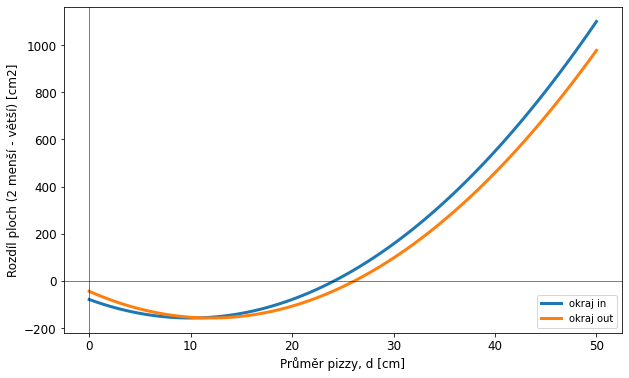

In [11]:
# Opětovné vykreslení grafů
plt.plot(d, f1, label='okraj in')
plt.plot(d, rozdil_ploch(d,1), label='okraj out')
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Průměr pizzy, d [cm]')
plt.ylabel('Rozdíl ploch (2 menší - větší) [cm2]')
plt.legend()
plt.show()

## Otázka k zamyšlení:
#### Je správně, že křivka pro d < 10 roste? Jak si to vysvětluješ? 
#### Dokážeš sešit upravit pro případ, že jdete na pizzu ve třech, porovnáváš tedy 1 vs 3?

----

# Pymarádu zdar!!!